# Purpose

Students have the option of using Pandas and SQL to complete this project. A Phase 1 project done completely in pandas, completely in SQL, or a mixture of the two can all be considered a fine Phase 1 project. This notebook serves as a resource for setting up an SQL database for students who wish to use SQL in their Phase 1 project.

**To create the `movies.db` database, run the code cells below.**
> The Entity Relational Diagram is below

In [4]:
from src.make_db import create_movies_db

In [3]:
create_movies_db()

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

![movies.db schema](images/movies_db_schema.png)

In [3]:
import pandas as pd
import json
import sqlite3
import matplotlib.pyplot as plt

In [9]:
conn = sqlite3.connect('data\movies.db')
df_rotten_movies = pd.read_sql('''
SELECT *
FROM rotten_tomatoes_movies
''', conn)

In [23]:
conn = sqlite3.connect('data\movies.db')
r_movies_info = pd.read_sql('''
SELECT movie_title, production_company, audience_status, audience_rating, audience_count
FROM rotten_tomatoes_movies
''', conn)

In [24]:
r_movies_info_c = r_movies_info.dropna()

In [25]:
r_movies_info_c.shape

(16832, 5)

In [10]:
df_rotten_movies.shape

(17712, 23)

In [11]:
# conn = sqlite3.connect('data\movies.db')
# df_bom_movies = pd.read_sql('''
# SELECT *
# FROM bom_movie_gross
# ''', conn)

In [28]:
r_movies_info_c.head(15)

,movie_title,production_company,audience_status,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,20th Century Fox,Spilled,53.0,254421.0
1,Please Give,Sony Pictures Classics,Upright,64.0,11574.0
2,10,Waner Bros.,Spilled,53.0,14684.0
3,12 Angry Men (Twelve Angry Men),Criterion Collection,Upright,97.0,105386.0
4,"20,000 Leagues Under The Sea",Disney,Upright,74.0,68918.0
5,"10,000 B.C.",Warner Bros. Pictures,Spilled,37.0,411140.0
6,The 39 Steps,Gaumont British Distributors,Upright,86.0,23890.0
7,3:10 to Yuma,Columbia Pictures,Upright,79.0,9243.0
8,Charly (A Heartbeat Away),Excel Entertainment,Upright,87.0,4819.0
9,Abraham Lincoln,United Artists,Spilled,40.0,457.0


In [39]:
r_movies_info_c["audience_spilled"] = r_movies_info_c.audience_status.copy().apply(lambda x: int(x=="Spilled"))

<ipython-input-39-e57922bbb208>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_movies_info_c["audience_spilled"] = r_movies_info_c.audience_status.copy().apply(lambda x: int(x=="Spilled"))


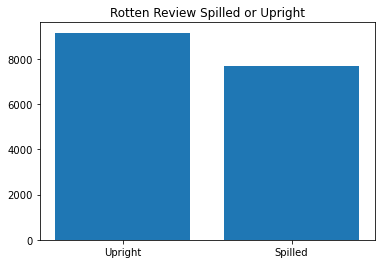

In [44]:
spilled = r_movies_info_c.audience_spilled.value_counts()
filled = lambda x: 'Spilled' if x == 1 else "Upright"
plt.bar([filled(x) for x in spilled.index], spilled.values)
plt.title('Rotten Review Spilled or Upright');

In [53]:
r_movies_info_c2 = r_movies_info_c.drop_duplicates('movie_title')
r_movies_info_c2.shape

(16276, 6)

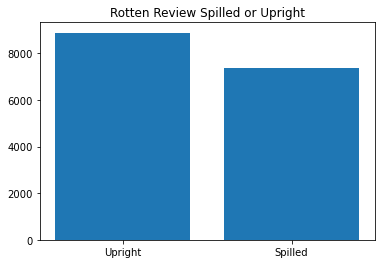

In [54]:
spilled = r_movies_info_c2.audience_spilled.value_counts()
filled = lambda x: 'Spilled' if x == 1 else "Upright"
plt.bar([filled(x) for x in spilled.index], spilled.values)
plt.title('Rotten Review Spilled or Upright');

In [55]:
r_movies_info_c2.value_counts("production_company")

production_company
Paramount Pictures                       483
Warner Bros. Pictures                    478
Universal Pictures                       463
20th Century Fox                         401
IFC Films                                397
                                        ... 
New Real Films                             1
New Line/Columbia Tristar                  1
New Line Cinema/Warner Bros. Pictures      1
New Line Cinema.                           1
10 West Studios                            1
Length: 2918, dtype: int64

In [62]:
new = r_movies_info_c2["production_company"].str.split('/',n = 1, expand = True)

In [64]:
r_movies_info_c2["production_company1"] = new[0]

<ipython-input-64-d3f85259a131>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_movies_info_c2["production_company1"] = new[0]


In [65]:
r_movies_info_c2["production_company2"] = new[1]

<ipython-input-65-4e21cdded53a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_movies_info_c2["production_company2"] = new[1]


In [86]:
r_movie_solo_pc = r_movies_info_c2[r_movies_info_c2["production_company2"]].str.contains(('None'), na=False)
r_movie_solo_pc
# r_movies_info_c2.head(20)

ValueError: Cannot mask with non-boolean array containing NA / NaN values